# Pymaceuticals Inc.
---

### Analysis ######

- Add your analysis here.
 

In [41]:
###Done
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
#print(merged_df)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
#Done
# Checking the number of mice.
unique_mice = merged_df['Mouse ID'].nunique()
print(f"Unique Mouse IDs: {unique_mice}")

Unique Mouse IDs: 249


In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Filter the DataFrame to show only the duplicate entries

# Key is 'Mouse ID' and 'Timepoint'
duplicates_mask = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

#Shows duplicate entries using the True/False mask
duplicate_entries = merged_df[duplicates_mask]

# Display the Mouse IDs and corresponding timeframes of the duplicates
duplicate_mouse_timeframes = duplicate_entries[['Mouse ID']].drop_duplicates()
print(f"Mouse IDs and Timeframes of duplicates: {duplicate_mouse_timeframes}")
#print(duplicate_mouse_timeframes)

Mouse IDs and Timeframes of duplicates:     Mouse ID
908     g989


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
display(merged_df_no_duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
display(merged_df_no_duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
###Done
grouped_df = merged_df.groupby('Drug Regimen')

# Now, you can perform various operations on the grouped data, for example, getting the mean value for each group:
mean_values = grouped_df.count()
print(grouped_df)

In [47]:
### Done
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
display(merged_df[duplicates])
len(duplicates)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


1893

In [48]:
### Done
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_no_duplicates = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
#merged_df_no_duplicates.head()
len(df_no_duplicates)

1888

In [49]:
### Wrong
# Checking the number of mice in the clean DataFrame.
no_duplicates = merged_df_no_duplicates['Mouse ID'].unique()
len(no_duplicates)

249

## Summary Statistics

In [52]:
###Done 
# Done
# # A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
merged_df_no_duplicates = pd.DataFrame(merged_df_no_duplicates)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_stats = merged_df_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
grouped_stats.head()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<BarContainer object of 10 artists>

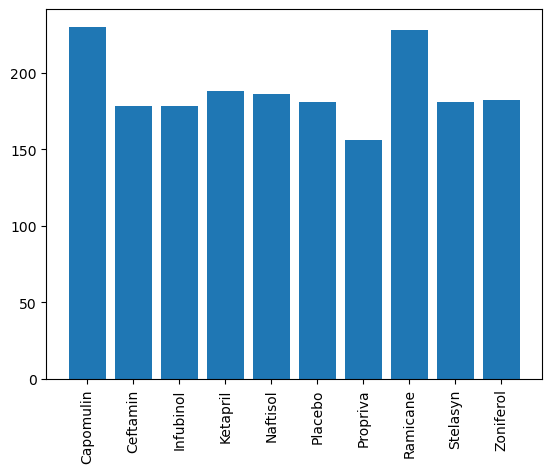

In [53]:
###Done
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Parameters
column_names = ['Drug Regimen', 'Timepoint']
group_by_column = 'Drug Regimen'
group_by_metric = 'Timepoint'
group_by_aggregate_type = 'count'

#Group by data will be used for graph
grouped_stats = merged_df_no_duplicates.groupby(group_by_column)[group_by_metric].agg(group_by_aggregate_type)

#Needed, not sure why
grouped_stats = grouped_stats.reset_index()

#Rename the grouped_stats dataframe columns
grouped_stats.rename(columns=dict(zip(grouped_stats.columns, column_names)), inplace=True)

#Puts data into the x and y graph bins
x_axis = grouped_stats[group_by_column]
y_axis = grouped_stats[group_by_metric]

#The xticks will overlap if not change to verticle instead of horizontal
plt.xticks(rotation=90)

#Plots the graphS
plt.bar(x_axis, y_axis)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


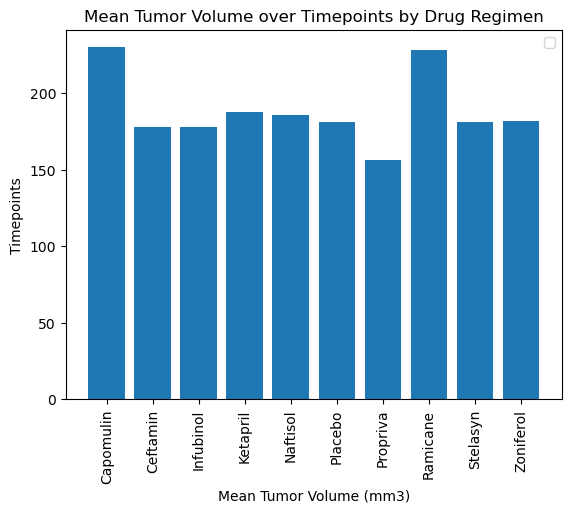

<Figure size 1000x600 with 0 Axes>

In [54]:
#Done - draft with issues
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# grouped_stats was created earlier.  Re-using, plus the parameters (even though they already exist, it helps to show them here).

# Parameters
column_names = ['Drug Regimen', 'Timepoint']
group_by_column = 'Drug Regimen'
group_by_metric = 'Timepoint'
group_by_aggregate_type = 'count'

#Group by data will be used for graph
grouped_stats = merged_df_no_duplicates.groupby(group_by_column)[group_by_metric].agg(group_by_aggregate_type)

#Needed, not sure why
grouped_stats = grouped_stats.reset_index()

#Rename the grouped_stats dataframe columns
grouped_stats.rename(columns=dict(zip(grouped_stats.columns, column_names)), inplace=True)

#Puts data into the x and y graph bins
x_axis = grouped_stats[group_by_column]
y_axis = grouped_stats[group_by_metric]

#The xticks will overlap if not change to verticle instead of horizontal
plt.xticks(rotation=90)

#Plots the graphS
plt.bar(x_axis, y_axis)
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
column_names = ['Drug Regimen', 'Timepoint']
group_by_column = 'Drug Regimen'
group_by_metric = 'Timepoint'
group_by_aggregate_type = 'count'

grouped_stats.head()

# Creating a bar chart

#for drug_regimen, group_data in grouped_stats.groupby('Drug Regimen'):
#    plt.bar(group_data['Timepoints'], group_data['Tumor Volume (mm3)'], label=drug_regimen, alpha=0.7)

# Adding labels and title
plt.ylabel('Timepoints')
plt.xlabel('Mean Tumor Volume (mm3)')
plt.title('Mean Tumor Volume over Timepoints by Drug Regimen')

# Adding legend
plt.legend()
plt.figure(figsize=(10, 6))
# Display the plot
plt.show()


,Sex,Sex Counts
0,Female,930
1,Male,958


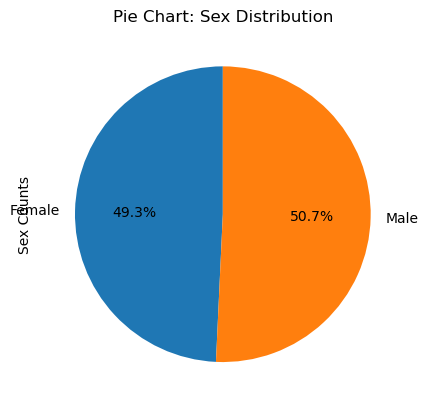

In [55]:
#Done
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Sandbox

# Assuming merged_df is your DataFrame
# Example DataFrame

# Not sure what is the ask
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_sex_groupby = merged_df_no_duplicates.groupby('Sex').agg({'Sex': 'count'}).rename(columns={'Sex': 'Sex Counts'}).reset_index()
display(df_sex_groupby)

# Plot a pie chart
df_sex_groupby.plot.pie(y='Sex Counts', labels=df_sex_groupby['Sex'], autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Pie Chart: Sex Distribution')
plt.show()


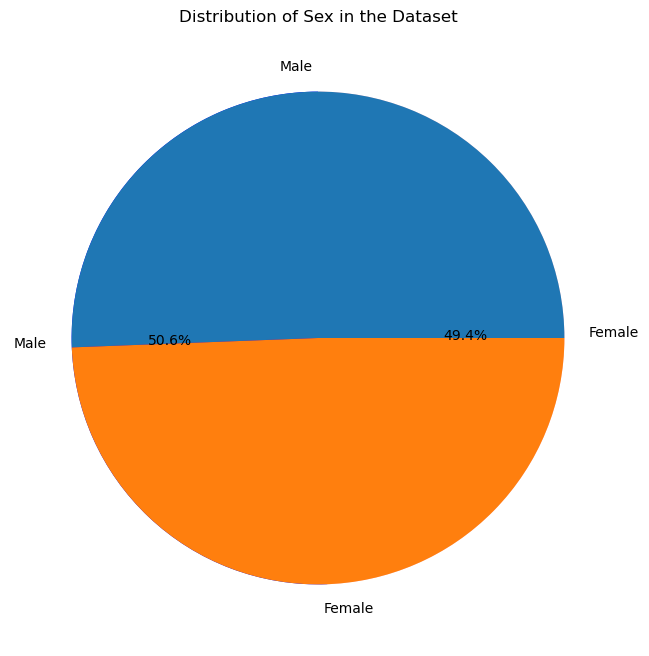

In [56]:

# Counting the occurrences of each sex
sex_counts = merged_df['Sex'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])

plt.pie(sex_counts, labels=sex_counts.index)
plt.title('Distribution of Sex in the Dataset')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
#Done
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:
### List with regiments
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
###Dataframe includes on regimens in the list above
treatment_regimens_filtered_df = merged_df_no_duplicates[merged_df_no_duplicates['Drug Regimen'].isin(treatment_regimens)]

### Start by getting the last (greatest) timepoint for each mouse
df_treatment_regimens_max_timepoints_per_mouse = treatment_regimens_filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_final_tumor_volume = merged_df_no_duplicates.merge(df_treatment_regimens_max_timepoints_per_mouse, on=['Mouse ID', 'Timepoint'], how='inner')
print(df_final_tumor_volume)

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
1            23.343598                 1  
2            28.48

# Bookmark #
- Not done

In [59]:
merged_df_no_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
### Put treatments into a list for for loop (and later for plot labels)
###Lecture starts at 1:54 for boxplots

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
lst_tumor_vol_data = []
lst_tumor_vol_data = merged_df_no_duplicates['Tumor Volume (mm3)'].tolist()
df_tumor_vol_data = merged_df_no_duplicates['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = df_tumor_vol_data.quantile([.25,.5,.75])   
#print(quartiles)
lowerq = df_tumor_vol_data.quantile([.25])  
upperq = df_tumor_vol_data.quantile([.75])  
quartiles = df_tumor_vol_data.quantile([.25,.5,.75]) 
df_tumor_vol_data.head()
"""
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

print(f"The mean is {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



irq = int(upperq) - int(lowerq)
print(f"The irq is {irq}")

lower_bound = lowerq - (1.5*irq)
upper_bound = upperq + (1.5*irq)




#merged_df_no_duplicates = merged_df_no_duplicates.dropna()

#df_merged_outliers = merged_df_no_duplicates.loc[(merged_df_no_duplicates['quartiles'] < lower_bound) | (merged_df_no_duplicates['quartiles'] > upper_bound)]
#df_merged_outliers.head()
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
"""

'\nprint(f"The lower quartile is {lowerq}")\nprint(f"The upper quartile is {upperq}")\n\nprint(f"The mean is {quartiles[0.5]}")\nprint(f"Values below {lower_bound} could be outliers.")\nprint(f"Values above {upper_bound} could be outliers.")\n\n\n\nirq = int(upperq) - int(lowerq)\nprint(f"The irq is {irq}")\n\nlower_bound = lowerq - (1.5*irq)\nupper_bound = upperq + (1.5*irq)\n\n\n\n\n#merged_df_no_duplicates = merged_df_no_duplicates.dropna()\n\n#df_merged_outliers = merged_df_no_duplicates.loc[(merged_df_no_duplicates[\'quartiles\'] < lower_bound) | (merged_df_no_duplicates[\'quartiles\'] > upper_bound)]\n#df_merged_outliers.head()\n    # Locate the rows which contain mice on each drug and get the tumor volumes\n\n    \n    # add subset \n\n    \n    # Determine outliers using upper and lower bounds\n'

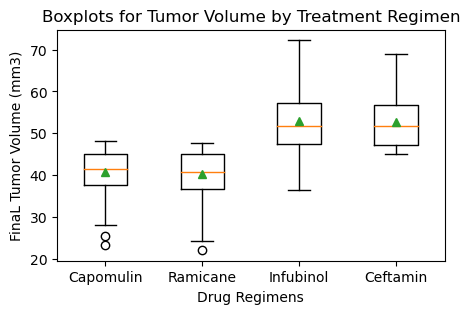

In [61]:
#Sandbox
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#plt.boxplot(lst_tumor_vol_data)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create a list of data frames for each regimen
dataframes_by_regimen = [merged_df_no_duplicates[merged_df_no_duplicates['Drug Regimen'] == regimen] for regimen in treatment_regimens]

# Create boxplots
plt.figure(figsize=(5, 3))
plt.boxplot([df['Tumor Volume (mm3)'] for df in dataframes_by_regimen], labels=treatment_regimens, showmeans = True)
plt.title('Boxplots for Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimens')
plt.ylabel('FinaL Tumor Volume (mm3)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b28f4712d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b28f472bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b28f4708d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b28f473d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b28a8244d0>],
 'means': []}

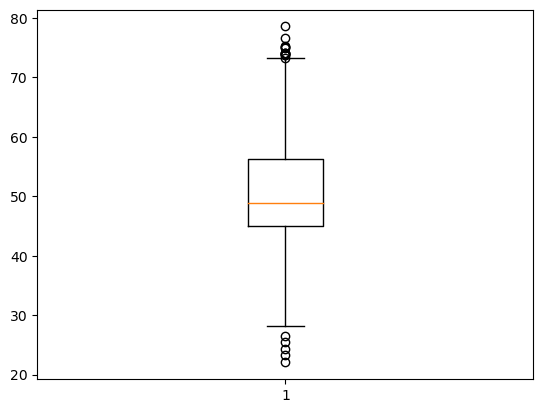

In [62]:
#Done
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
lst_tumor_vol_data = []
lst_tumor_vol_data = merged_df_no_duplicates['Tumor Volume (mm3)'].tolist()
plt.boxplot(lst_tumor_vol_data)

## Line and Scatter Plots

In [63]:
#Done
mouse_data = merged_df_no_duplicates[(merged_df_no_duplicates['Mouse ID'] == mouse_id_to_plot) & 
                                     (merged_df_no_duplicates['Drug Regimen'] == drug_regimen_to_plot)]


NameError: name 'mouse_id_to_plot' is not defined

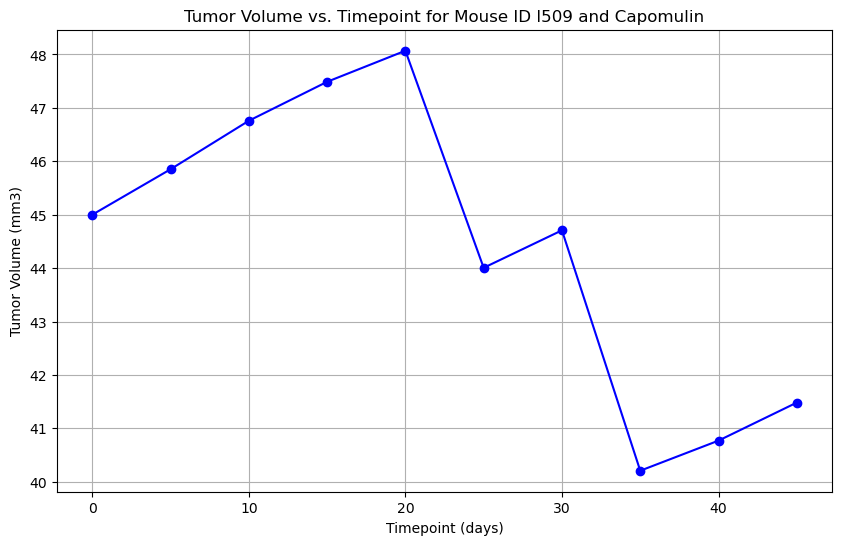

In [64]:
#Done
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id_to_plot = 'l509'  # Mouse ID
drug_regimen_to_plot = 'Capomulin'

mouse_data = merged_df_no_duplicates[(merged_df_no_duplicates['Mouse ID'] == mouse_id_to_plot) & (merged_df_no_duplicates['Drug Regimen'] == drug_regimen_to_plot)]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Timepoint for Mouse ID {mouse_id_to_plot} and {drug_regimen_to_plot}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


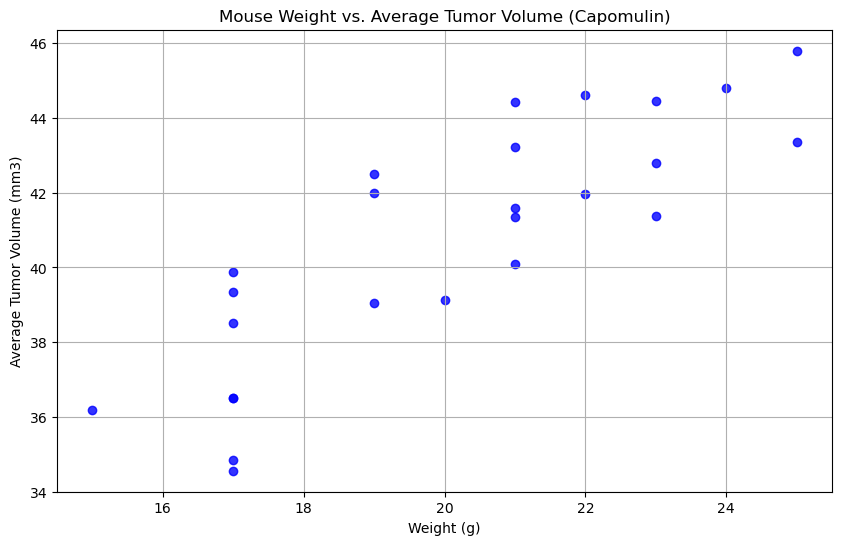

In [65]:
#Done
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

drug_regimen = 'Capomulin'

# Filter DataFrame for the 'Capomulin' drug regimen
capomulin_data = merged_df_no_duplicates[merged_df_no_duplicates['Drug Regimen'] == drug_regimen]

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='b', alpha=0.8)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

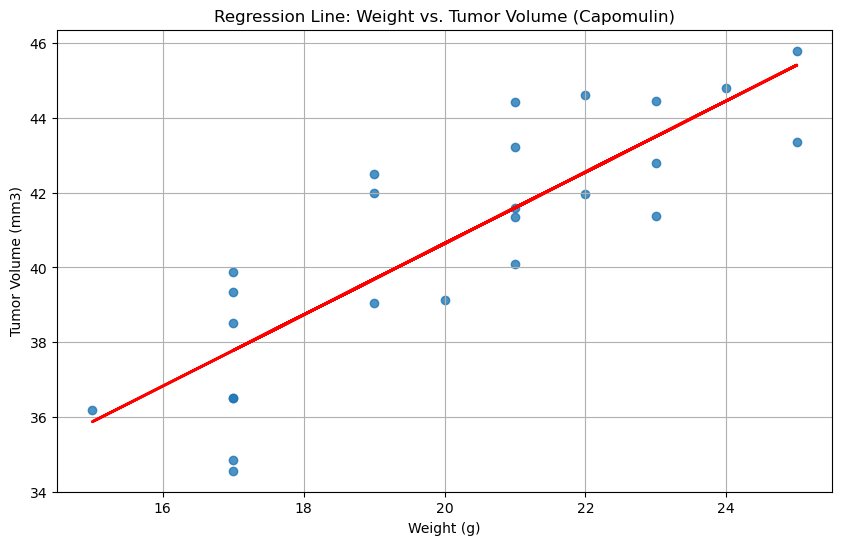

NameError: name 'correlation_coefficient' is not defined

In [66]:
#Done
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
drug_regimen = 'Capomulin'

# Filter DataFrame for the 'Capomulin' drug regimen
capomulin_data = merged_data

# Calculate the regression line using numpy.polyfit
slope, intercept = np.polyfit(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], 1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], alpha=0.8)
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', linewidth=2)
plt.title('Regression Line: Weight vs. Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')
